# 可视化模型的 Scale&Shift 参数
## ViT-b16

In [4]:
import sys
import os
PROJECT_ROOT="/home/wyh/PEFT/SSF"
PROJECT_ROOT="/home/wyh/SSF"
PROJECT_ROOT="/home/wyh/LLM/SSF"
SAVED_ROOT="/media/disk1/wyh/SSF"
sys.path.append(PROJECT_ROOT)
import torch
import timm
from timm.models import create_model, safe_model_name, resume_checkpoint, load_checkpoint,\
    convert_splitbn_model, model_parameters
from models import vision_transformer, swin_transformer, convnext, as_mlp



In [5]:
MODEL_NAME="vit_base_patch16_224_in21k"
MODEL_PATH="vit_base_patch16_224_in21k/cifar_100/ssf/20230521-144333-vit_base_patch16_224_in21k-224/model_best.pth.tar"
# 235
MODEL_PATH="vit_base_patch16_224_in21k/cifar_100/ssf/20230523-171946-vit_base_patch16_224_in21k-224/model_best.pth.tar"
MODEL_PATH="vit_base_patch16_224_in21k/cifar_100/pruning/20230608-204025-vit_base_patch16_224_in21k-224/model_best.pth.tar"
MODEL_PATH=os.path.join(SAVED_ROOT,MODEL_PATH)
MODEL_PATH="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/checkpoint-90.pth.tar"
MODEL_PATH="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/model_best.pth.tar"
MODEL_PATH="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234424-vit_base_patch16_224_in21k-224/model_best.pth.tar"
MODEL_PATH="/data/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_retrain/20230720-095813-vit_base_patch16_224_in21k-224/checkpoint-50.pth.tar"
MODEL_PATH="/data/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_retrain/20230720-095813-vit_base_patch16_224_in21k-224/checkpoint-88.pth.tar"
METHOD_NAME="ssf"
METHOD_NAME="ssfmerge"
NUM_CLASSES=100

In [6]:

model = create_model(
    MODEL_NAME,
    pretrained=True,
    num_classes=NUM_CLASSES,
    drop_rate=0.0,
    drop_path_rate=0.0,
    drop_block_rate=None,
    global_pool=None,
    bn_momentum=None,
    bn_eps=None,
    scriptable=False,
    checkpoint_path='',
    tuning_mode=METHOD_NAME)
resume_epoch = resume_checkpoint(
    model, MODEL_PATH,
    optimizer=None,
    loss_scaler=None,
    log_info=True)


In [7]:
# for i,(name,module) in enumerate(model.named_modules()) :
#     # print(name)
#     cw=False
#     for m in module.children():
#         if hasattr(m,"weight"):
#             cw=True
#     if cw:
#     # if hasattr(module,"weight"):
#         print(i,"\t",name)
#         print("PARAMETER: ")
#         for n,p in module.named_parameters():
#             print(n,"\t",p.shape)
#         print("DICT:")
#         # print(type(module.weight),module.weight.size())
#         for k in module.__dict__:
#             print("\t",k)
# for j,(name,parameters) in enumerate(model.named_parameters()):
#     key=["ssf_scale","ssf_scale"]
#     if any([k in name for k in key]):
#         print("{}\t{}\t{}\t{}".format(j,name,parameters.shape,parameters.data.shape))        
    

In [8]:
ssf_scale,ssf_shift,ssf_merge={},{},{}
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale[name]=para.data.detach().cpu().numpy()
    elif "ssf_shift" in name:
        ssf_shift[name]=para.data.detach().cpu().numpy()
    elif "merge" in name:
        ssf_merge[name]=para.data.detach().cpu().numpy()
        pass

In [9]:
# show basic info of ssf_scale and ssf_shift:
print("Length: ",len(ssf_scale),"\t",len(ssf_shift))
print("SSF_SCALE:")
for k in ssf_scale:
    print(k,ssf_scale[k].shape)
print("SSF_SHIFT:")
for k in ssf_shift:
    print(k,ssf_shift[k].shape)
print("SSF_MERGE:")
for k in ssf_merge:
    print(k,ssf_merge[k].shape)
    

Length:  74 	 74
SSF_SCALE:
ssf_scale_1 (768,)
patch_embed.ssf_scale_1 (768,)
blocks.0.ssf_scale_1 (768,)
blocks.0.ssf_scale_2 (768,)
blocks.0.attn.ssf_scale_1 (2304,)
blocks.0.attn.ssf_scale_2 (768,)
blocks.0.mlp.ssf_scale_1 (3072,)
blocks.0.mlp.ssf_scale_2 (768,)
blocks.1.ssf_scale_1 (768,)
blocks.1.ssf_scale_2 (768,)
blocks.1.attn.ssf_scale_1 (2304,)
blocks.1.attn.ssf_scale_2 (768,)
blocks.1.mlp.ssf_scale_1 (3072,)
blocks.1.mlp.ssf_scale_2 (768,)
blocks.2.ssf_scale_1 (768,)
blocks.2.ssf_scale_2 (768,)
blocks.2.attn.ssf_scale_1 (2304,)
blocks.2.attn.ssf_scale_2 (768,)
blocks.2.mlp.ssf_scale_1 (3072,)
blocks.2.mlp.ssf_scale_2 (768,)
blocks.3.ssf_scale_1 (768,)
blocks.3.ssf_scale_2 (768,)
blocks.3.attn.ssf_scale_1 (2304,)
blocks.3.attn.ssf_scale_2 (768,)
blocks.3.mlp.ssf_scale_1 (3072,)
blocks.3.mlp.ssf_scale_2 (768,)
blocks.4.ssf_scale_1 (768,)
blocks.4.ssf_scale_2 (768,)
blocks.4.attn.ssf_scale_1 (2304,)
blocks.4.attn.ssf_scale_2 (768,)
blocks.4.mlp.ssf_scale_1 (3072,)
blocks.4.mlp.s

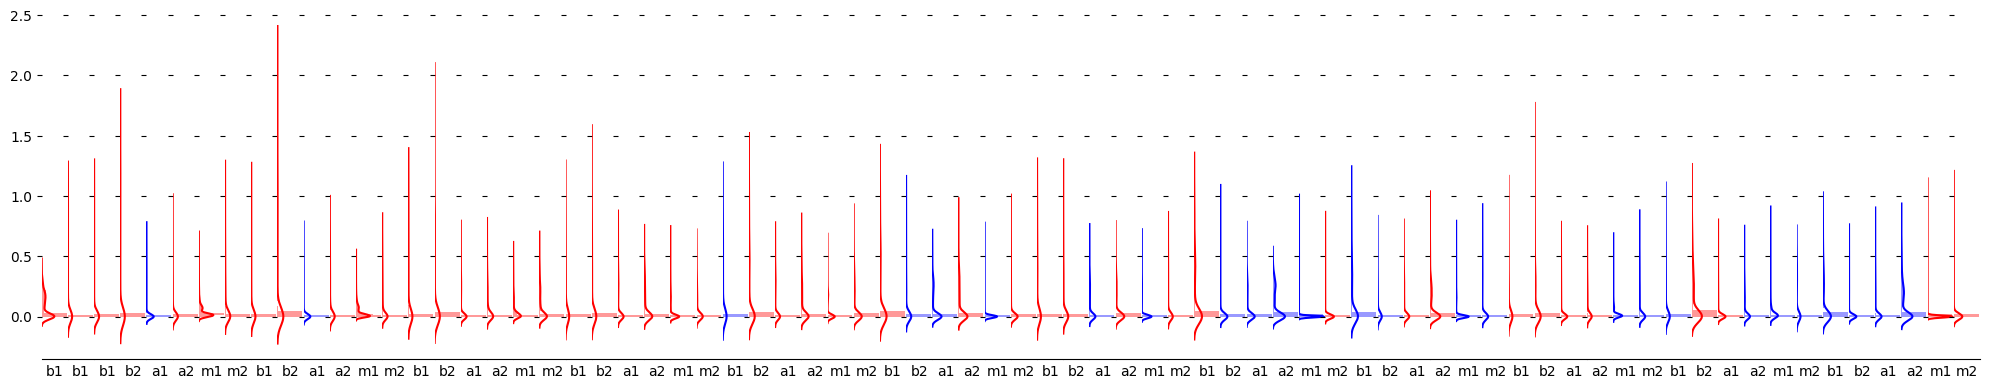

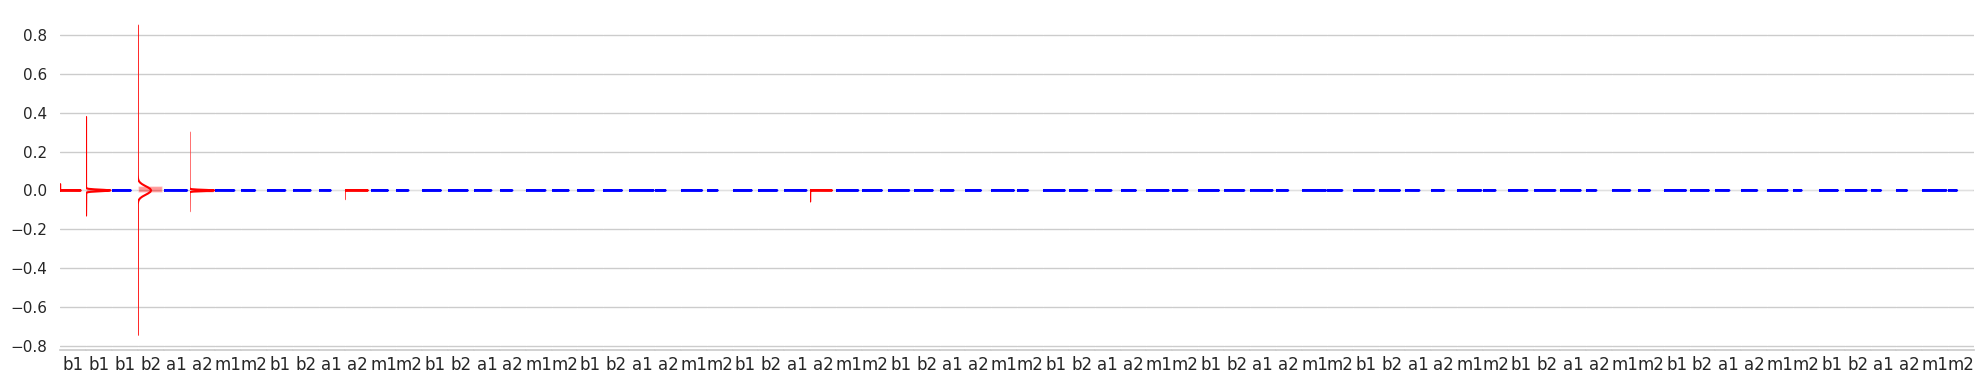

MAX Scale:  2.1853964
MIN Scale:  -0.005809303
MAX Shift:  0.7830001
MIN Shift:  -0.67802906


In [10]:
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.models as models

def draw6(row1,name=None):
    data=row1
    arr = data
    up_mean=np.mean(np.array([a.max() for a in arr]))
    lw_mean=np.mean(np.array([a.min() for a in arr]))
    num_rows = len(arr)
    fig, axs = plt.subplots(ncols=num_rows, nrows=1, sharey=True,gridspec_kw={"hspace": 0, "wspace": 0})
    fig.set_size_inches(20, 4)
    lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
    ran=(lw,up_mean*1.5)
    ran=(lw,up_mean*1.5)
    for i in range(num_rows):
        # sns.histplot(y=arr[i], ax=axs[i], kde=True, stat="density")
        # sns.distplot(arr[i], ax=axs[i], kde=True, stat="density",hist_kws={'range': (0.0, 0.2)})
        color="blue"
        if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
            color="red"
        sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color)
        # sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color,\
        #     hist_kws={'range': ran},kde_kws={'clip': ran})
        # sns.histplot(data, clip=(0, 10))
        axs[i].set_xticks([])
        # axs[i].set_xlabel(f"{i+1}")
        label=""
        if 'attn' in name[i]:
            label+="a"
        elif 'mlp' in name[i]:
            label+="m"
        else:
            label+="b"
        label+=name[i].split("_")[-1]
        axs[i].set_xlabel(label)
    plt.tight_layout()
    # sns.set_style('white')
    sns.set(style='whitegrid')
    sns.despine(right=True,left=True)
    plt.show()
ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=[],[],[],[]
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale_list.append(para.data.detach().cpu().numpy())
        ssf_scale_name.append(name)
    elif "ssf_shift" in name:
        ssf_shift_list.append(para.data.detach().cpu().numpy())
        ssf_shift_name.append(name)
    else:
        pass
draw6(ssf_scale_list,ssf_scale_name)
draw6(ssf_shift_list,ssf_shift_name)
print("MAX Scale: ", max([s.max() for s in ssf_scale_list]))
print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
print("MIN Shift: ", min([s.min() for s in ssf_shift_list]))

In [11]:
# print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
# print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
sc_num=0
sc_pnm=0
for i,(sc,sh) in enumerate(zip(ssf_scale_list,ssf_shift_list)):
    # select indexes from sc, where abs value is less than 0.02
    # indexes=np.where(np.abs(sc)<0.02)
    indexes=np.argwhere(np.abs(sc)<0.01)
    subsc=np.take(sc,indexes)
    sc_pnm+=len(subsc)
    sc_num+=len(sc)
    subsh=np.take(sh,indexes)
    
    # subsh=np.take(sh,indexes)
    print("{:.2f} Layer {}:\t{}/{}\t{:.2f}%".format(np.abs(subsh).mean(), i,len(subsc),len(sc),len(subsc)/len(sc)*100))
print("Total:\t{}/{}\t{:.2f}%".format(sc_pnm,sc_num,sc_pnm/sc_num*100))

0.00 Layer 0:	381/768	49.61%
0.00 Layer 1:	673/768	87.63%
0.00 Layer 2:	696/768	90.62%
0.01 Layer 3:	683/768	88.93%
0.00 Layer 4:	2124/2304	92.19%
0.00 Layer 5:	652/768	84.90%
0.00 Layer 6:	672/3072	21.88%
0.00 Layer 7:	543/768	70.70%
0.00 Layer 8:	665/768	86.59%
0.00 Layer 9:	656/768	85.42%
0.00 Layer 10:	2012/2304	87.33%
0.00 Layer 11:	570/768	74.22%
0.00 Layer 12:	1096/3072	35.68%
0.00 Layer 13:	543/768	70.70%
0.00 Layer 14:	625/768	81.38%
0.00 Layer 15:	570/768	74.22%
0.00 Layer 16:	1858/2304	80.64%
0.00 Layer 17:	485/768	63.15%
0.00 Layer 18:	1501/3072	48.86%
0.00 Layer 19:	475/768	61.85%
0.00 Layer 20:	562/768	73.18%
0.00 Layer 21:	574/768	74.74%
0.00 Layer 22:	1693/2304	73.48%
0.00 Layer 23:	488/768	63.54%
0.00 Layer 24:	2408/3072	78.39%
0.00 Layer 25:	527/768	68.62%
0.00 Layer 26:	553/768	72.01%
0.00 Layer 27:	547/768	71.22%
0.00 Layer 28:	1684/2304	73.09%
0.00 Layer 29:	515/768	67.06%
0.00 Layer 30:	2397/3072	78.03%
0.00 Layer 31:	518/768	67.45%
0.00 Layer 32:	531/768	69.14%
0

In [12]:
# def print_outler(row1,name=None):
#     data=row1
#     arr = data
#     up_mean=np.mean(np.array([a.max() for a in arr]))
#     lw_mean=np.mean(np.array([a.min() for a in arr]))
#     num_rows = len(arr)
#     lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
#     ran=(lw,up_mean*1.5)
#     for i in range(len(row1)):
#         if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
#             print(name[i])
# print_outler(ssf_scale_list,ssf_scale_name)
# print_outler(ssf_shift_list,ssf_shift_name)


# 运行计时
5.23 00:35 开始运行 ./train_scripts/vit/cifar_vtab